In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MJT(bounds, T):
    """
    Solver to calculate trajectory of duration T subject to boundary conditions.

    Args:
      bounds:
        Length 6 array. For a lateral trajectory the entries would correspond to:
        [s_i, s_i_dot, s_i_double_dot, s_f, s_f_dot, s_f_double_dot]

      T:
        Duration of maneuver

    Returns:
      A length 6 array which corresponds to the 6 coefficients in a
      5th degree polynomial.
    """
    b = np.array(bounds)
    A = np.array([
    [1, 0, 0, 0, 0,  0],
    [0, 1, 0, 0, 0,  0],
    [0, 0, 1, 0, 0,  0],
    [1, T, T**2, T**3, T**4, T**5],
    [0, 1, 2*T, 3*T**2, 4*T**3, 5*T**4],
    [0, 0, 2, 6*T, 12*T**2, 20*T**3],
        ])
    return np.linalg.solve(A,b)

In [3]:
bounds = [0.1, 0.01, 0.001, 0.5, 0.25, 0.15]
T = 10

In [4]:
poly = MJT(bounds,T)
print(poly)

[  1.00000000e-01   1.00000000e-02   1.00000000e-03   6.00000000e-04
  -2.40000000e-04   2.00000000e-05]


In [5]:
x = []
y = []
for i in range((T*10)+1):
    e = i/10
    x.append(e)
    res = poly[0] + (poly[1]*e) + (poly[2]*pow(e,2)) + (poly[3]*pow(e,3)) + (poly[4]*pow(e,4)) + (poly[5]*pow(e,5))
    y.append(res)
    print(str(e) + " " + str(res))

0.0 0.1
0.1 0.1010105762
0.2 0.1020444224
0.3 0.1031043046
0.4 0.1041924608
0.5 0.105310625
0.6 0.1064600512
0.7 0.1076415374
0.8 0.1088554496
0.9 0.1101017458
1.0 0.11138
1.1 0.1126894262
1.2 0.1140289024
1.3 0.1153969946
1.4 0.1167919808
1.5 0.118211875
1.6 0.1196544512
1.7 0.1211172674
1.8 0.1225976896
1.9 0.1240929158
2.0 0.1256
2.1 0.1271158762
2.2 0.1286373824
2.3 0.1301612846
2.4 0.1316843008
2.5 0.133203125
2.6 0.1347144512
2.7 0.1362149974
2.8 0.1377015296
2.9 0.1391708858
3.0 0.14062
3.1 0.1420459262
3.2 0.1434458624
3.3 0.1448171746
3.4 0.1461574208
3.5 0.147464375
3.6 0.1487360512
3.7 0.1499707274
3.8 0.1511669696
3.9 0.1523236558
4.0 0.15344
4.1 0.1545155762
4.2 0.1555503424
4.3 0.1565446646
4.4 0.1574993408
4.5 0.158415625
4.6 0.1592952512
4.7 0.1601404574
4.8 0.1609540096
4.9 0.1617392258
5.0 0.1625
5.1 0.1632408262
5.2 0.1639668224
5.3 0.1646837546
5.4 0.1653980608
5.5 0.166116875
5.6 0.1668480512
5.7 0.1676001874
5.8 0.1683826496
5.9 0.1692055958
6.0 0.17008
6.1 0.1710

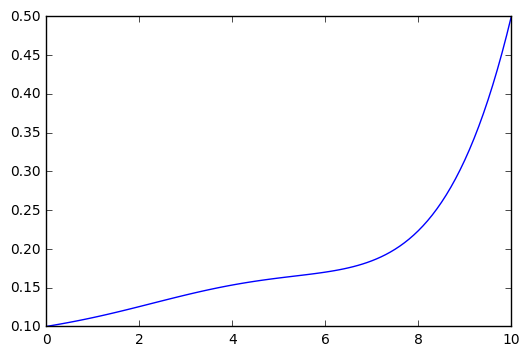

In [6]:
plt.plot(x, y)
plt.show()

0.0
0.00258544847502
0.010278131578
0.0228886299204
0.0401064311813
0.0615075759508
0.0865650970186
0.114661995055
0.145106431181
0.177148762342
0.21
0.242851237658
0.274893568819
0.305338004945
0.333434902981
0.358492424049
0.379893568819
0.39711137008
0.409721868422
0.417414551525
0.42


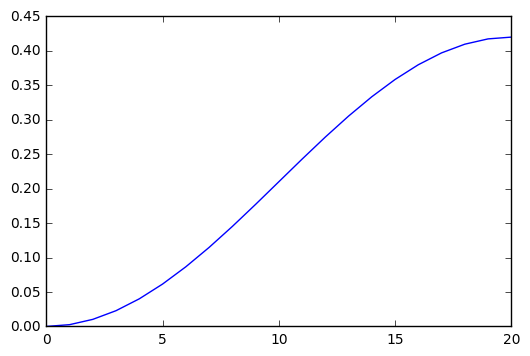

In [7]:
x_start = 0.0
x_finish = 0.42

subd =20
x2 = []
for pt in range(subd+1):
    p =pt/subd
    res = x_start + (0.5 * (1 - np.cos(p * np.pi)) * (x_finish - x_start))
    print(res)
    x2.append(res)
    
plt.plot(x2)
plt.show()

10.061558297
10.2447174185
10.5449673791
10.9549150281
11.4644660941
12.0610737385
12.7300475013
13.4549150281
14.2178276748
15.0
15.7821723252
16.5450849719
17.2699524987
17.9389262615
18.5355339059
19.0450849719
19.4550326209
19.7552825815
19.938441703
20.0


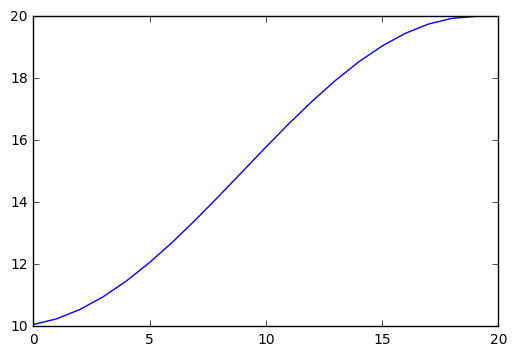

In [11]:
x_start = 10.0
x_finish = 20.0

p = 0.0
subd =20
x2 = []
res= x_start

while (res < x_finish):
    p += 1/subd
    res = x_start + (0.5 * (1 - np.cos(p * np.pi)) * (x_finish - x_start))
    print(res)
    x2.append(res)
    
plt.plot(x2)
plt.show()

0.0615582970243
0.306275715549
0.851243094607
1.80615812273
3.2706242168
5.33169795534
8.06174545664
11.5166604848


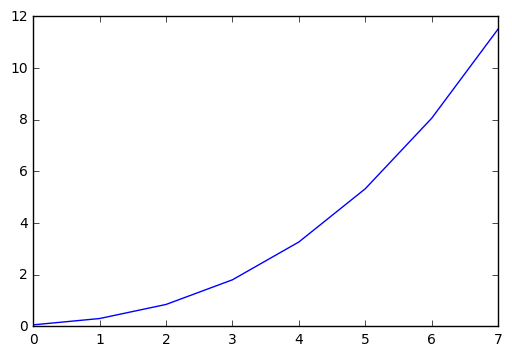

In [10]:
x = 0.0
x_finish = 10.0

p = 0.0
p_inc = 1/20
x2 = []

x_start =x

# while (p <= (1.0 + p_inc)):
while (x < x_finish):
    p += p_inc
    x += (0.5 * (1 - np.cos(p * np.pi)) * (x_finish-x_start))
    print(x)
    x2.append(x)
    
plt.plot(x2)
plt.show()

19.938441703
19.7552825815
19.4550326209
19.0450849719
18.5355339059
17.9389262615
17.2699524987
16.5450849719
15.7821723252
15.0
14.2178276748
13.4549150281
12.7300475013
12.0610737385
11.4644660941
10.9549150281
10.5449673791
10.2447174185
10.061558297
10.0


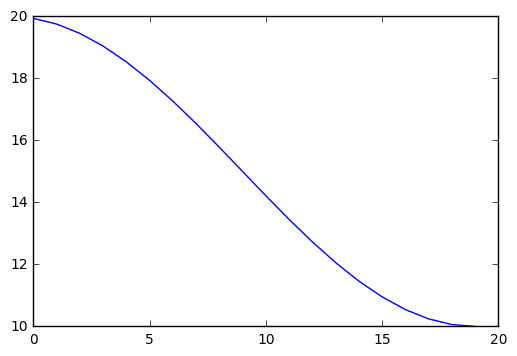

In [14]:
x_start = 20.0
x_finish = 10.0

p = 0.0
subd =20
x3 = []
res= x_start

while (res > x_finish):
    p += 1/subd
    res = x_start - (0.5 * (1 - np.cos(p * np.pi)) * (x_start - x_finish ))
    print(res)
    x3.append(res)
    
plt.plot(x3)
plt.show()